<a href="https://colab.research.google.com/github/blancosophia/Entrega3/blob/main/Holografia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2048 2048
(2048, 2048)


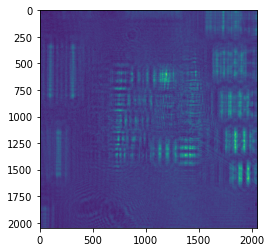

In [1]:
#Cargar imagen.
import numpy as np
from matplotlib import pyplot as plt
import cv2
H= cv2.imread("/content/Hologram.tiff",0)
h,w= H.shape[:2]
print(h,w)
plt.imshow(H)
print(H.shape)

In [2]:
nm= 1e-6

N= 2048
l= 6.513
z= 73
wl= 633*nm
k= 2*np.pi/wl
dx=dy = l/N #Tamaño de pixel.

In [3]:
TR=cv2.dft(np.float32(H),flags=cv2.DFT_COMPLEX_OUTPUT)
TR1= np.fft.fftshift(TR)

TR2 =20* np.log(cv2.magnitude(TR1[:,:,0], TR1[:,:,1]))

In [4]:

def mask(radius,r,N,M):
  t, s = np.ogrid[0:N,0:M]
  mask = (t-1024)**2 + (s-1024)**2<=r*r 
  array = np.ones((N,M,2), np.uint8)
  array[mask] = 0
  return array

def imask(radius,r,N,M):
  t, s = np.ogrid[0:N,0:M]
  mask = (t-1468)**2 + (s-325)**2<=r*r 
  array = np.zeros((N,M,2), np.uint8)
  array[mask] = 1
  return array

def wave1(N,A,B):
  mask=np.zeros((N,N,2))
  for t in range(-1*int(N/2),int(N/2)):
    for s in range(-1*int(N/2),int(N/2)):
       mask[t,s] = np.exp(1j*k*(dx*np.cos(A)*t+dy*np.cos(B)*s))
  return mask


In [6]:
rows, cols =H.shape
M0= mask(300,300,rows,cols)
dH0=TR1*M0
dHH0=2000*np.log(cv2.magnitude(dH0[:,:,0],dH0[:,:,1]))

print(np.asarray(np.where(dHH0==dHH0.max())))

[[ 580 1468]
 [1723  325]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


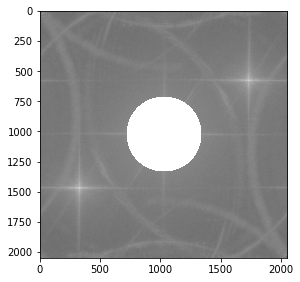

In [7]:

fig=plt.figure(figsize=(10,10))
a1= fig.add_subplot(2,2,1)
a1.imshow(dHH0, cmap='gray')
plt.show()

In [8]:
rows, cols =H.shape
M= imask(300,300,rows,cols)
dH=TR1*M
dHH=2000*np.log(cv2.magnitude(dH[:,:,0],dH[:,:,1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


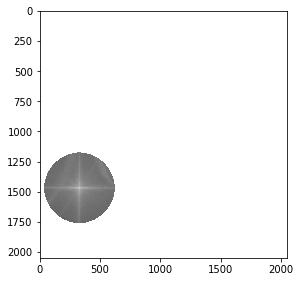

In [9]:
fig=plt.figure(figsize=(10,10))
a1= fig.add_subplot(2,2,1)
a1.imshow(dHH, cmap='gray')
plt.show()

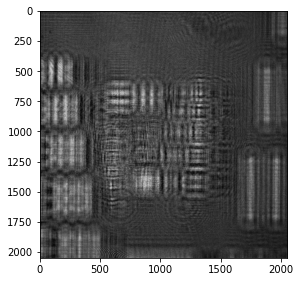

In [10]:
#dHS=np.fft.ifftshift(dH)
Out= cv2.idft(dH)
Output= cv2.magnitude(Out[:,:,0],Out[:,:,1])

fig=plt.figure(figsize=(10,10))
a2= fig.add_subplot(2,2,3)
a2.imshow(Output, cmap='gray')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


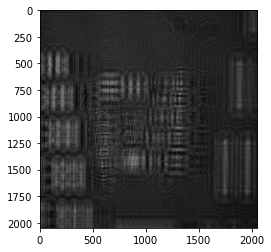

In [11]:
mat= wave1(N,0.565,1.005)
imf= Out*mat
imf1=cv2.magnitude(imf[:,:,0],imf[:,:,1])
plt.imshow(imf1,cmap='gray')

In [12]:
#Propagando
hh= np.zeros((N,N,2))*np.exp(-1j*0)
for t in range(int(-N/2),int(N/2)): 
                for s in range(int(-N/2),int(N/2)):
                    h= np.exp(1j*k*((dx*t)**2 + (dx*s)**2)/(2*z)) 
                    hh[t,s]=h 

hh=np.fft.fftshift(hh)                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


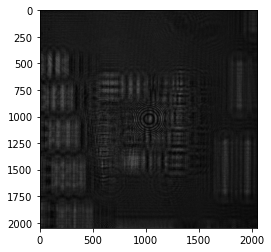

In [13]:
T= imf*hh
T1=cv2.magnitude(np.float32(T[:,:,0]),np.float32(T[:,:,1]))
plt.imshow(T1,cmap='gray')
